In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
num_epoch = 10000 # training iterations
lr = 0.3 # empirically this number seems to work well

<h2>Define your input data and expected labels</h2>

In [3]:
# define input data and XOR gate outputs
x = np.array([[0,0], [0,1], [1, 0], [1,1]], np.float32)
y = np.array([[0], [1], [1] , [0]], np.float32)

<h2>Define placeholder and Variables</h2>

In [4]:
tf.reset_default_graph() # reset
# placeholders for feeding
X_in = tf.placeholder(tf.float32, shape=(None,2))
Y_hat = tf.placeholder(tf.float32, shape=(None,1))

# neural net vars
# hidden layer
w1 = tf.Variable(tf.random_normal(shape=[2,2]), tf.float32)
b1 = tf.Variable(tf.zeros([1,1]),tf.float32)

# output layer
wout = tf.Variable(tf.random_normal(shape=[2,1]), tf.float32)
bout = tf.Variable(tf.zeros([1,1]), tf.float32)

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [5]:
h_lay_out = tf.sigmoid(tf.add(tf.matmul(X_in, w1), b1)) # single hidden layer with sigmoid activation
output = tf.add(tf.matmul(h_lay_out, wout), bout) # output layer, scalar, sigmoid for classification

<h2>Define cost function</h2>

In [6]:
# cross entropy as cost
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output,labels=Y_hat))

#define loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels (classification is round)
correct_pred = tf.equal(tf.round(tf.sigmoid(output)),Y_hat)

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

In [7]:
# create a grid to evaluate the decision boundary in the session
x1 = np.linspace(0,1,100)
x2 = np.linspace(0,1,100)
X, Y = np.meshgrid(x1, x2)
X_flat = np.reshape(X, (100**2, 1)) # flatten to pass
Y_flat = np.reshape(Y, (100**2, 1)) # flatten to pass
to_compute = np.concatenate((X_flat, Y_flat), axis=1)
dummy_y = np.zeros((100**2, 1)) # dont care about acc, just output

<h2>Execute training</h2>

In [12]:
# sensitive to initialization conditions. Rerun until
# proper convergence is observed
with tf.Session() as sess:
    sess.run(init)

    for i in range(num_epoch):
        sess.run(train_op, feed_dict={X_in: x, Y_hat: y})
        if i % 1000 == 0:
            # too many epochs to print each epoch
            # loss, for observing convergence
            print(sess.run(loss, feed_dict={X_in: x, Y_hat: y}))
            # Output for input state
            print(sess.run(correct_pred, feed_dict={X_in: x, Y_hat: y}))
            # accuracy
            acc = sess.run(accuracy,feed_dict={X_in: x, Y_hat: y})
            print("Epoch "+str(i)+", Accuracy= {:.3f}".format(acc))
    # evaluate the model on the grid
    out_grid = sess.run(output, feed_dict={X_in: to_compute, Y_hat: dummy_y})
    print("Training finished!")
    

0.7118945
[[False]
 [ True]
 [ True]
 [False]]
Epoch 0, Accuracy= 0.500
0.38653484
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 1000, Accuracy= 1.000
0.050063454
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 2000, Accuracy= 1.000
0.022136688
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 3000, Accuracy= 1.000
0.01383904
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 4000, Accuracy= 1.000
0.009973521
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 5000, Accuracy= 1.000
0.007761596
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 6000, Accuracy= 1.000
0.0063367975
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 7000, Accuracy= 1.000
0.005345545
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 8000, Accuracy= 1.000
0.004617522
[[ True]
 [ True]
 [ True]
 [ True]]
Epoch 9000, Accuracy= 1.000
Training finished!


<h2>Plot</h2>

Text(0.5, 1.0, 'XOR Gate Decision Boundary \n Black Region = 0, White Region = 1')

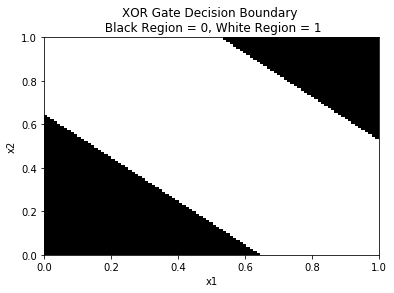

In [14]:
# sigmoid for modifying output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# reshape the x1, x2 pairs passed through the model
r_grid = np.round(sigmoid(np.reshape(out_grid, (100,100))))
plt.figure(1)
# display decision boundary
plt.pcolor(X, Y, r_grid, cmap='gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Gate Decision Boundary \n Black Region = 0, White Region = 1')